In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nfl-scores-and-betting-data/nfl_stadiums.csv
/kaggle/input/nfl-scores-and-betting-data/nfl_teams.csv
/kaggle/input/nfl-scores-and-betting-data/spreadspoke_scores.csv
/kaggle/input/nfl-scores-and-betting-data/spreadspoke.R


Some of the default packages that will be implemented throughout the Python script. The main focus of my particular script will really be just to look at mainly the the pandas package and gain some experience with data processing.

In [2]:
# This just reads in the spreadspoke_scores.csv file

games = pd.read_csv("../input/nfl-scores-and-betting-data/spreadspoke_scores.csv")

In [3]:
# This is just a good command to check that the data file has been read in.
# All this command does is display the first 5 rows of a file as it has been
# initiated with default parameters.

games.head()

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail
0,9/2/1966,1966,1,False,Miami Dolphins,14.0,23.0,Oakland Raiders,NaN,NaN,NaN,Orange Bowl,False,83.0,6.0,71.0,NaN
1,9/3/1966,1966,1,False,Houston Oilers,45.0,7.0,Denver Broncos,NaN,NaN,NaN,Rice Stadium,False,81.0,7.0,70.0,NaN
2,9/4/1966,1966,1,False,San Diego Chargers,27.0,7.0,Buffalo Bills,NaN,NaN,NaN,Balboa Stadium,False,70.0,7.0,82.0,NaN
3,9/9/1966,1966,2,False,Miami Dolphins,14.0,19.0,New York Jets,NaN,NaN,NaN,Orange Bowl,False,82.0,11.0,78.0,NaN
4,9/10/1966,1966,1,False,Green Bay Packers,24.0,3.0,Baltimore Colts,NaN,NaN,NaN,Lambeau Field,False,64.0,8.0,62.0,NaN


In [4]:
# Here we are essentially using this line to allow us to only work with games that were schedule after 2009.

games_2010s = games[ games.schedule_season > 2009]

# We use this line just to double check that it is working by printing out the first five lines of the 2010 games.

games_2010s.head()

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail
10008,9/9/2010,2010,1,False,New Orleans Saints,14.0,9.0,Minnesota Vikings,NO,-5.0,49.5,Louisiana Superdome,False,72.0,0.0,NaN,DOME
10009,9/12/2010,2010,1,False,Buffalo Bills,10.0,15.0,Miami Dolphins,MIA,-3.0,39,Ralph Wilson Stadium,False,64.0,7.0,81.0,NaN
10010,9/12/2010,2010,1,False,Chicago Bears,19.0,14.0,Detroit Lions,CHI,-6.5,45,Soldier Field,False,75.0,1.0,45.0,NaN
10011,9/12/2010,2010,1,False,Houston Texans,34.0,24.0,Indianapolis Colts,IND,-1.0,48,Reliant Stadium,False,89.0,5.0,NaN,DOME (Open Roof)
10012,9/12/2010,2010,1,False,Jacksonville Jaguars,24.0,17.0,Denver Broncos,JAX,-3.0,41.5,EverBank Field,False,91.0,1.0,67.0,NaN


In [5]:
# This command outputs the number of games played in each weather detail. Useful as the goal of this project is to determine how weather effects football games.
# So it is a useful command to just give us a preview of the type of data set that we will be working with.

games_2010s.groupby('weather_detail').size()

weather_detail
DOME                    806
DOME (Open Roof)         56
Fog                      25
Rain                    101
Rain | Fog               18
Snow                     13
Snow | Fog                5
Snow | Freezing Rain      1
dtype: int64

<AxesSubplot:xlabel='score_away', ylabel='score_home'>

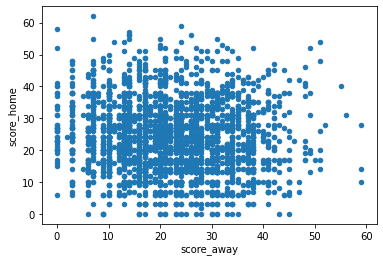

In [6]:
# This is just some starter code syntax for building scatterplots in the pandas environment.

games_2010s.plot(kind = 'scatter', x = 'score_away', y = 'score_home')

This is the default code to allow us to create a scatter plot with the pandas package in Python. It also lets us know the csv is working as it is supposed to.

In [7]:
# This allows us to create a new column within the csv that allows us to see the total points score on both sides for each football game.

games_2010s["total_pts"] = games_2010s.score_home + games_2010s.score_away

# This command is used to double check that the csv now has a total points column.

games_2010s

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail,total_pts
10008,9/9/2010,2010,1,False,New Orleans Saints,14.0,9.0,Minnesota Vikings,NO,-5.0,49.5,Louisiana Superdome,False,72.0,0.0,NaN,DOME,23.0
10009,9/12/2010,2010,1,False,Buffalo Bills,10.0,15.0,Miami Dolphins,MIA,-3.0,39,Ralph Wilson Stadium,False,64.0,7.0,81.0,NaN,25.0
10010,9/12/2010,2010,1,False,Chicago Bears,19.0,14.0,Detroit Lions,CHI,-6.5,45,Soldier Field,False,75.0,1.0,45.0,NaN,33.0
10011,9/12/2010,2010,1,False,Houston Texans,34.0,24.0,Indianapolis Colts,IND,-1.0,48,Reliant Stadium,False,89.0,5.0,NaN,DOME (Open Roof),58.0
10012,9/12/2010,2010,1,False,Jacksonville Jaguars,24.0,17.0,Denver Broncos,JAX,-3.0,41.5,EverBank Field,False,91.0,1.0,67.0,NaN,41.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13227,1/23/2022,2021,Division,True,Kansas City Chiefs,42.0,36.0,Buffalo Bills,KC,-2.5,54.0,Arrowhead Stadium,False,35.0,6.0,54.0,NaN,78.0
13228,1/23/2022,2021,Division,True,Tampa Bay Buccaneers,27.0,30.0,Los Angeles Rams,TB,-3.0,48.0,Raymond James Stadium,False,50.0,11.0,69.0,NaN,57.0
13229,1/30/2022,2021,Conference,True,Kansas City Chiefs,24.0,27.0,Cincinnati Bengals,KC,-7.0,54.5,Arrowhead Stadium,False,41.0,4.0,41.0,NaN,51.0
13230,1/30/2022,2021,Conference,True,Los Angeles Rams,20.0,17.0,San Francisco 49ers,LAR,-3.5,46.0,SoFi Stadium,False,72.0,0.0,NaN,DOME,37.0


<AxesSubplot:xlabel='weather_wind_mph', ylabel='total_pts'>

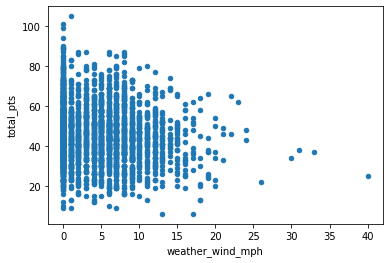

In [8]:
# This plot compares the total points variable against the wind speed variable. As we can see from the scatterplot below there seems to be a high 
# correlation between wind speed and points per game. This scatter plot helps to prove that the lower the wind speed, the more points that are able
# to be scored per game.

games_2010s.plot(kind = 'scatter', x = 'weather_wind_mph', y = 'total_pts')

The analysis we were able to obtain from this plot is that there is a relationship between wind speed and total points scored in a football game. Also that we can draw the conclusion that as the wind speed gets stronger that less points are scored in a football game. This follows a strong correlation.

<AxesSubplot:xlabel='weather_temperature', ylabel='total_pts'>

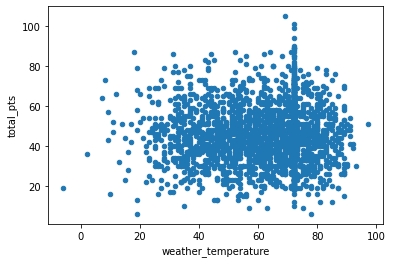

In [9]:
# In this plot we see that we can't real make any conclusions out of it as the total pts per game seem to be relative regardless of temperature.
# Thus, it is fair to say that temperature doesn't really effect the amount of points that are scored during football games.

games_2010s.plot(kind = 'scatter', x = 'weather_temperature', y = 'total_pts')

Here we see that total points scored in a football game and temperature has no correlation.

<AxesSubplot:xlabel='weather_humidity', ylabel='total_pts'>

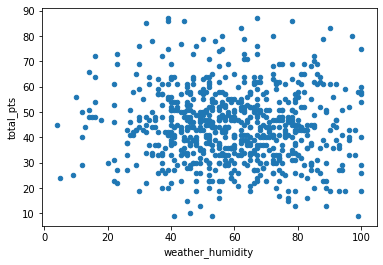

In [10]:
# Here we see that regardless of the humidity the amount of points scored per game still seems to be a bit scattered. Thus, it may also be fair
# to say that humidity doesn't really effect the total points scored during a football game.

games_2010s.plot(kind = 'scatter', x = 'weather_humidity', y = 'total_pts')

Here we see that total points scored in a football game and humidity have no correlation.

In [11]:
# In the given scores csv we get a weather detail column which is nice, however, what if we wanted to see the difference in pts in games when just generally 
# outside vs. inside. Well this function allows us to do so by determining if the game is played within a dome or not. Technically even though the roof is 
# open I still consider the game played indoors just because at the end of the day it is still being played within a dome.

def indoor_outdoor_func(df):
    
    if df['weather_detail'] == 'DOME':
        return 'Indoors'
    elif df['weather_detail'] == 'DOME (OPEN ROOF)':
        return 'Indoors'
    else:
        return 'Outdoors'

# This line allows us to add a new indoor/outdoor column to our already exisiting csv file.

games_2010s['indoor_outdoor'] = games_2010s.apply(indoor_outdoor_func, axis=1)

# This command is just to simply check that the new column is outputting in the csv file appropriately.

games_2010s

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail,total_pts,indoor_outdoor
10008,9/9/2010,2010,1,False,New Orleans Saints,14.0,9.0,Minnesota Vikings,NO,-5.0,49.5,Louisiana Superdome,False,72.0,0.0,NaN,DOME,23.0,Indoors
10009,9/12/2010,2010,1,False,Buffalo Bills,10.0,15.0,Miami Dolphins,MIA,-3.0,39,Ralph Wilson Stadium,False,64.0,7.0,81.0,NaN,25.0,Outdoors
10010,9/12/2010,2010,1,False,Chicago Bears,19.0,14.0,Detroit Lions,CHI,-6.5,45,Soldier Field,False,75.0,1.0,45.0,NaN,33.0,Outdoors
10011,9/12/2010,2010,1,False,Houston Texans,34.0,24.0,Indianapolis Colts,IND,-1.0,48,Reliant Stadium,False,89.0,5.0,NaN,DOME (Open Roof),58.0,Outdoors
10012,9/12/2010,2010,1,False,Jacksonville Jaguars,24.0,17.0,Denver Broncos,JAX,-3.0,41.5,EverBank Field,False,91.0,1.0,67.0,NaN,41.0,Outdoors
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13227,1/23/2022,2021,Division,True,Kansas City Chiefs,42.0,36.0,Buffalo Bills,KC,-2.5,54.0,Arrowhead Stadium,False,35.0,6.0,54.0,NaN,78.0,Outdoors
13228,1/23/2022,2021,Division,True,Tampa Bay Buccaneers,27.0,30.0,Los Angeles Rams,TB,-3.0,48.0,Raymond James Stadium,False,50.0,11.0,69.0,NaN,57.0,Outdoors
13229,1/30/2022,2021,Conference,True,Kansas City Chiefs,24.0,27.0,Cincinnati Bengals,KC,-7.0,54.5,Arrowhead Stadium,False,41.0,4.0,41.0,NaN,51.0,Outdoors
13230,1/30/2022,2021,Conference,True,Los Angeles Rams,20.0,17.0,San Francisco 49ers,LAR,-3.5,46.0,SoFi Stadium,False,72.0,0.0,NaN,DOME,37.0,Indoors


<AxesSubplot:ylabel='indoor_outdoor'>

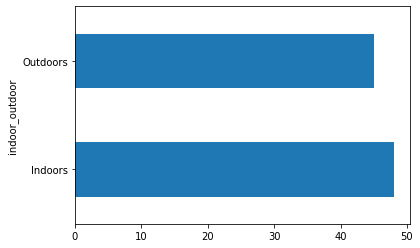

In [12]:
# .barh simply just makes the bar graph horizontal. This graph compares the mean of total pts per game depending
# if the game was played indoors or outdoors.

games_2010s.groupby('indoor_outdoor').total_pts.mean().plot.barh()

We see that it is possible to draw a conclusion that more points are typically scored during indoor games versus outdoor games due to large sample size of the data set we are working with.

<AxesSubplot:ylabel='indoor_outdoor'>

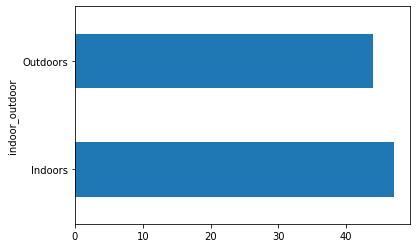

In [13]:
# This graph compares the median of total pts per game depending if the game was played indoors or outdoors.

games_2010s.groupby('indoor_outdoor').total_pts.median().plot.barh()

The median bar plot being consistent with the mean bar plot further supports that conclusion.

<AxesSubplot:ylabel='weather_detail'>

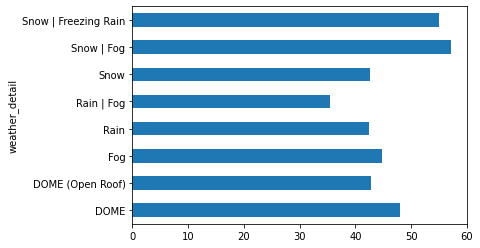

In [14]:
# This graph compares the mean of total pts per game depending on the type of weather during games.

games_2010s.groupby('weather_detail').total_pts.mean().plot.barh()

<AxesSubplot:ylabel='weather_detail'>

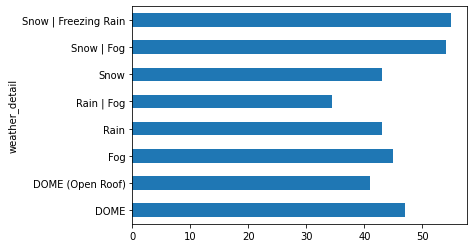

In [15]:
# This graph compares the median of total pts per game depending on the type of weather during games.

games_2010s.groupby('weather_detail').total_pts.median().plot.barh()

In [16]:
games_2010s.groupby('weather_detail').size()

weather_detail
DOME                    806
DOME (Open Roof)         56
Fog                      25
Rain                    101
Rain | Fog               18
Snow                     13
Snow | Fog                5
Snow | Freezing Rain      1
dtype: int64

These two plots show that no conclusions can be drawn from the type of weather and total points scored, but this is mainly because their is not enough data (games played) for each category, that it would be fair to use these plots.

So we pretty much have a good idea of what variables of weather may effect the total points of football games
after looking through all these plots.

The conclusions that can be drawn are: 

1. Games with greater wind speed may lead to less total points being scored in a football game.
2. Temperature and humidity have no significant effect on the total points scored in a football game.
3. Typically more points will be scored in games played in a dome versus outside. I believe this may because the dome helps to block wind which we have found does effect total points scored in football games.
4. We do not have enough data to prove that games played in snow lead to more points scored in football games. (Typically we need sample sizes of atleast a 100 to show that a category could be "statistically significant")

In [17]:
x = games_2010s['total_pts'].values
y = games_2010s['score_home'].values

new_x = []
new_y = []

for item in x:
    if str(item) != 'nan':
        new_x.append(item)
        
for item in y:
    if str(item) != 'nan':
        new_y.append(item)

mean_x = np.mean(new_x)
mean_y = np.mean(new_y)

num = 0.0 
den = 0.0

m = len(new_x)

for i in range(m):
    num += (new_x[i] - mean_x) * (new_y[i] - mean_y)
    den += (new_x[i] - mean_x) ** 2

b1 = num / den
b0 = mean_y - (b1 * mean_x)

print(b1, b0)

TSS = 0
RSS = 0
for i in range(m):
    ypred = (b1 * new_x[i]) + b0
    TSS += (new_y[i] - mean_y) ** 2
    RSS += (new_y[i] - ypred) ** 2
r2 = 1 - (RSS / TSS)

print(r2)


0.5206041976798195 0.08533712980993968
0.49688470958350983
